In [1]:
import pandas as pd
import xml.etree.ElementTree as xet

In [2]:
from glob import glob 

In [3]:
path = glob('./images/*.xml')
path

['./images\\Cars0.xml',
 './images\\Cars1.xml',
 './images\\Cars10.xml',
 './images\\Cars100.xml',
 './images\\Cars101.xml',
 './images\\Cars102.xml',
 './images\\Cars103.xml',
 './images\\Cars104.xml',
 './images\\Cars105.xml',
 './images\\Cars106.xml',
 './images\\Cars107.xml',
 './images\\Cars108.xml',
 './images\\Cars109.xml',
 './images\\Cars11.xml',
 './images\\Cars110.xml',
 './images\\Cars111.xml',
 './images\\Cars112.xml',
 './images\\Cars113.xml',
 './images\\Cars114.xml',
 './images\\Cars115.xml',
 './images\\Cars116.xml',
 './images\\Cars117.xml',
 './images\\Cars118.xml',
 './images\\Cars119.xml',
 './images\\Cars12.xml',
 './images\\Cars120.xml',
 './images\\Cars121.xml',
 './images\\Cars122.xml',
 './images\\Cars123.xml',
 './images\\Cars124.xml',
 './images\\Cars125.xml',
 './images\\Cars126.xml',
 './images\\Cars127.xml',
 './images\\Cars128.xml',
 './images\\Cars129.xml',
 './images\\Cars13.xml',
 './images\\Cars130.xml',
 './images\\Cars131.xml',
 './images\\Cars132.

In [4]:
labels_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[])
for filename in path:

#filename = path[0]
    info = xet.parse(filename)
    root = info.getroot()
    member_object = root.find('object')
    labels_info = member_object.find('bndbox')
    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)
    #print(xmin,xmax,ymin,ymax)

    labels_dict['filepath'].append(filename)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)

In [5]:
df = pd.DataFrame(labels_dict)
df

,filepath,xmin,xmax,ymin,ymax
0,./images\Cars0.xml,226,419,125,173
1,./images\Cars1.xml,134,262,128,160
2,./images\Cars10.xml,140,303,5,148
3,./images\Cars100.xml,175,214,114,131
4,./images\Cars101.xml,167,240,202,220
...,...,...,...,...,...
428,./images\Cars95.xml,278,407,182,263
429,./images\Cars96.xml,133,261,126,160
430,./images\Cars97.xml,98,297,102,191
431,./images\Cars98.xml,85,247,196,259


In [6]:
df.to_csv('labels.csv',index=False)

#LOAD DATA AND GET IMAGE FILENAME

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import cv2

In [8]:
df = pd.read_csv('labels.csv')
df.head()

,filepath,xmin,xmax,ymin,ymax
0,./images\Cars0.xml,226,419,125,173
1,./images\Cars1.xml,134,262,128,160
2,./images\Cars10.xml,140,303,5,148
3,./images\Cars100.xml,175,214,114,131
4,./images\Cars101.xml,167,240,202,220


In [9]:
#for reading the xml image

In [10]:
filename = df['filepath'][0]
filename

'./images\\Cars0.xml'

In [11]:
def getfilename(filename):
    filename_image = xet.parse(filename).getroot().find('filename').text
    filepath_image = os.path.join('./images/photos', filename_image)
    return filepath_image

In [12]:
getfilename(filename)

'./images/photos\\Cars0.png'

In [13]:
#applying the function to the tabel to get overall result

In [14]:
image_path = list(df['filepath'].apply(getfilename))
image_path

['./images/photos\\Cars0.png',
 './images/photos\\Cars1.png',
 './images/photos\\Cars10.png',
 './images/photos\\Cars100.png',
 './images/photos\\Cars101.png',
 './images/photos\\Cars102.png',
 './images/photos\\Cars103.png',
 './images/photos\\Cars104.png',
 './images/photos\\Cars105.png',
 './images/photos\\Cars106.png',
 './images/photos\\Cars107.png',
 './images/photos\\Cars108.png',
 './images/photos\\Cars109.png',
 './images/photos\\Cars11.png',
 './images/photos\\Cars110.png',
 './images/photos\\Cars111.png',
 './images/photos\\Cars112.png',
 './images/photos\\Cars113.png',
 './images/photos\\Cars114.png',
 './images/photos\\Cars115.png',
 './images/photos\\Cars116.png',
 './images/photos\\Cars117.png',
 './images/photos\\Cars118.png',
 './images/photos\\Cars119.png',
 './images/photos\\Cars12.png',
 './images/photos\\Cars120.png',
 './images/photos\\Cars121.png',
 './images/photos\\Cars122.png',
 './images/photos\\Cars123.png',
 './images/photos\\Cars124.png',
 './images/photos

VERIFY DATA

In [15]:
file_path = image_path[2]
file_path

'./images/photos\\Cars10.png'

In [16]:
img = cv2.imread(file_path)

cv2.namedWindow('example',cv2.WINDOW_NORMAL)
cv2.imshow('example',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
#focusing or crop on the no. plate

#140	303	5	148

cv2.rectangle(img,(140,5),(303,148),(0,255,0),3)
cv2.namedWindow('example',cv2.WINDOW_NORMAL)
cv2.imshow('example',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

DATA PREPROCESSING

In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [19]:
labels = df.iloc[:,1:].values

In [20]:
data = []
output = []
for ind in range(len(image_path)):
    image = image_path[ind]
    img_arr = cv2.imread(image)
    
    #h = height
    #w = weidth
    #d = depth
    h,w,d  = img_arr.shape
    
    # preprocesing
    load_image = load_img(image,target_size=(224,224))
    
    load_img_arr = img_to_array(load_image)
    
    # input normalization
    norm_load_image_arr = load_img_arr/255.0
    
    # nornalization to labels
    xmin,xmax,ymin,ymax = labels[ind]
    nxmin,nxmax = xmin/w,xmax/w
    nymin,nymax = ymin/h,ymax/h
    
    # normalized output
    label_norm = (nxmin,nxmax,nymin,nymax)
    
    # ------------append
    data.append(norm_load_image_arr)
    output.append(label_norm)

In [21]:
x = np.array(data,dtype=np.float32)
y = np.array(output,dtype=np.float32)

In [22]:
x.shape,y.shape

((433, 224, 224, 3), (433, 4))

 SPLITING DATA IN TRAIN AND TESTING

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((346, 224, 224, 3), (87, 224, 224, 3), (346, 4), (87, 4))

DEEP LEARNING MODEL

In [24]:
from tensorflow.keras.applications import MobileNetV2, InceptionV3, InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model
import tensorflow as tf


In [25]:
inception_resnet = InceptionResNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))

inception_resnet.trainable=False

# -------------------
headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel = Dense(500,activation="relu")(headmodel)
headmodel = Dense(250,activation="relu")(headmodel)
headmodel = Dense(4,activation="sigmoid")(headmodel)

# ------------model
model = Model(inputs=inception_resnet.input,outputs=headmodel)

In [26]:
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

MODEL TRAINING

In [27]:
from tensorflow.keras.callbacks import TensorBoard

In [28]:
tfb = TensorBoard('object_dtection')

In [29]:
#model fitting
history = model.fit(x=x_train,y=y_train,batch_size=5,epochs=50,
                    validation_data=(x_test,y_test),callbacks=[tfb])

Epoch 1/50
70/70 [==============================] - 54s 659ms/step - loss: 0.1090 - val_loss: 0.0561
Epoch 2/50
70/70 [==============================] - 44s 626ms/step - loss: 0.0328 - val_loss: 0.0363
Epoch 3/50
70/70 [==============================] - 42s 594ms/step - loss: 0.0186 - val_loss: 0.0218
Epoch 4/50
70/70 [==============================] - 43s 614ms/step - loss: 0.0088 - val_loss: 0.0171
Epoch 5/50
70/70 [==============================] - 43s 618ms/step - loss: 0.0044 - val_loss: 0.0151
Epoch 6/50
70/70 [==============================] - 43s 620ms/step - loss: 0.0028 - val_loss: 0.0154
Epoch 7/50
70/70 [==============================] - 43s 615ms/step - loss: 0.0021 - val_loss: 0.0149
Epoch 8/50
70/70 [==============================] - 42s 604ms/step - loss: 0.0019 - val_loss: 0.0158
Epoch 9/50
70/70 [==============================] - 43s 617ms/step - loss: 0.0019 - val_loss: 0.0164
Epoch 10/50
70/70 [==============================] - 44s 631ms/step - loss: 0.0021 - val_lo

In [ ]:
#after anaylsing above loss pattern it can be seen that if itrarte more and more then the loss will reduce
#history = model.fit(x=x_train,y=y_train,batch_size=5,epochs=200,
                    #validation_data=(x_test,y_test),callbacks=      
                    #[tfb],intial_epoch=101)

SAVING MODEL

In [31]:
model.save('./models/object_detection.h5')

PREDICTION OF MODEL 

In [35]:
# load model

model = tf.keras.models.load_model('./models/object_detection.h5')
print('model loaded sucessfully')

model loaded sucessfully


In [40]:
path = './images/photos/cars48.png'

#pil object
image = load_img(path)

#8 bit array(0,255)
image = np.array(image,dtype=np.uint8)
image1 = load_img(path,target_size=(224,224))

#convert into arrayand get the normalized output
image_arr_224 = img_to_array(image1)/255.0
 

In [43]:
#size of the original image
h,w,d = image.shape
print('Height of the image = ',h)
print('Width of the image = ',w)

Height of the image =  225
Width of the image =  400


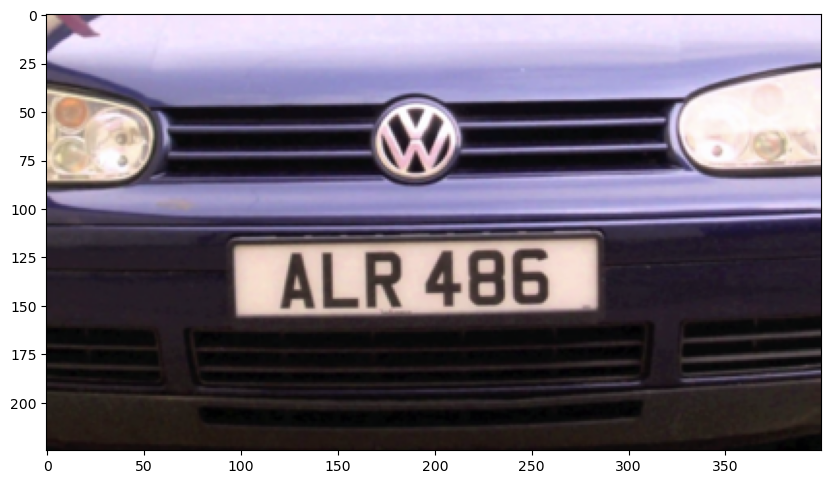

In [46]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [47]:
image_arr_224.shape

(224, 224, 3)

In [49]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape
#here 1 indicates number of image and we use this to pass the images in the model 

(1, 224, 224, 3)

In [51]:
#make pridiction 
coords = model.predict(test_arr)
coords

1/1 [==============================] - 0s 197ms/step


array([[0.24367476, 0.6808281 , 0.5071304 , 0.6987514 ]], dtype=float32)

In [52]:
#denormalize the values
denorm = np.array([w,w,h,h])
coords = coords*denorm
coords

array([[ 97.46990204, 272.33123779, 114.1043365 , 157.21906275]])

In [53]:
coords = coords.astype(np.int32)
coords

array([[ 97, 272, 114, 157]])

(97, 114) (272, 157)


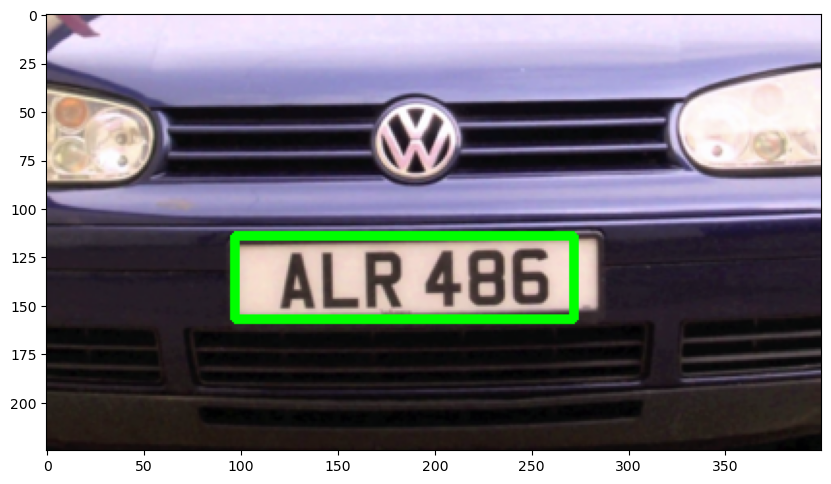

In [54]:
#draw bounding on the top the image
xmin,xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin) 
pt2 =(xmax,ymax)
print(pt1,pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [55]:
# create pipline
path = './images/photos/cars48.png'
def object_detection(path):

    #read iamge
    image = load_img(path)

    #8 bit array(0,255)
    image = np.array(image,dtype=np.uint8)
    image1 = load_img(path,target_size=(224,224))

    #convert into arrayand get the normalized output
    image_arr_224 = img_to_array(image1)/255.0
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)

    #make prediction
    coords = model.predict(test_arr)

    #denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords*denorm
    coords = coords.astype(np.int32)

    #draw bounding on top the image 
    xmin,xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin) 
    pt2 =(xmax,ymax)
    print(pt1,pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords 


1/1 [==============================] - 0s 229ms/step
(97, 114) (272, 157)


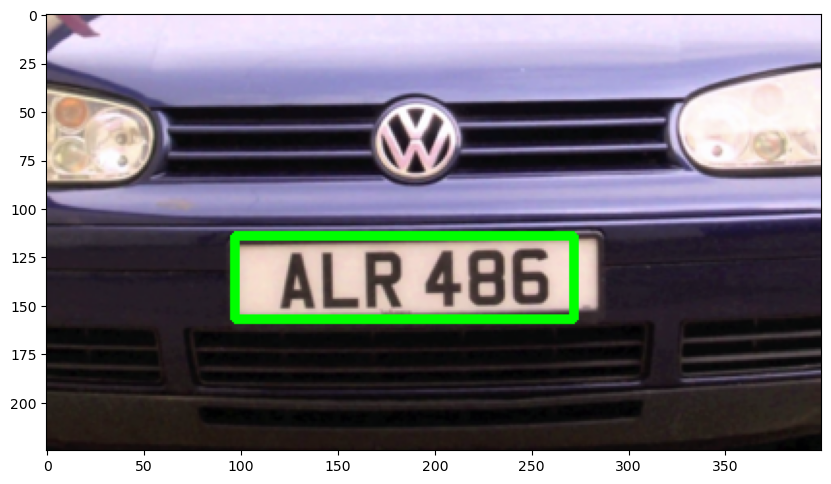

In [57]:
path = './images/photos/cars48.png'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [80]:
!pip install pytesseract
import pytesseract as pt

OPTICAL CHARACTER RECOGNITION - OCR

1/1 [==============================] - 0s 268ms/step
(97, 114) (272, 157)


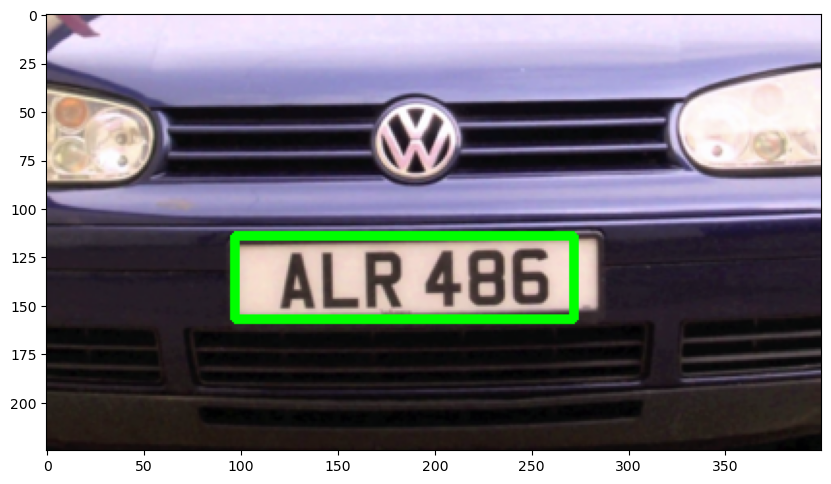

In [81]:
path = './images/photos/cars48.png'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [82]:
img = np.array(load_img(path))
xmin, xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

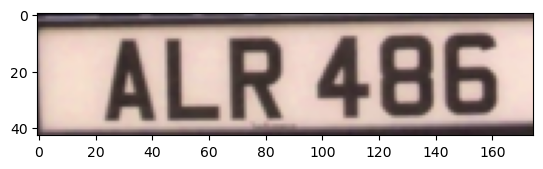

In [83]:
plt.imshow(roi)
plt.show()

In [90]:
# extract text from image
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Natasha Meena\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'
text=pt.image_to_string(roi,lang='eng',config='--psm 6')
print(text)

ALR 486

